In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [18]:
xmin = -2             #minimum x value
xmax = 2              #maximum x value
Nx = 101              #number of x values
dx = (xmax-xmin)/(Nx-1)   #delta x

tmax = 15            #maximum t value
dt = 0.02             #timestep size
iterations = int(tmax/dt)

c = 0.8              #velocity
courant = c*dt/dx         #CFL

x = np.linspace (xmin, xmax, Nx)         #x values as vector
t = np.linspace (0, tmax, iterations+1)  #t values as vector
U = np.zeros((iterations+1, Nx))         #matrix to store approximations
U[0,:] = np.exp(-0.5*(x**2))           #IC
U[1,:] = np.exp(-0.5*(x**2))

In [19]:
assert abs(courant)<1

Do forward euler for U1
"odd even decoupling" - why there are oscillations
"filtered leapfrog" - don't use it

Periodic Boundary Conditions

U^(n+1)_{m} = U^n_mod(m,M)

In [16]:
for n in range (1, iterations):  #for time n...
    for j in range(1,Nx-1):
        U[n+1,j] = U[n-1,j] - courant*(U[n, j+1]-U[n,j-1])
    U[n+1,0] = U[n+1,1]
    U[n+1,-1] = U[n+1, -2]

<IPython.core.display.Javascript object>


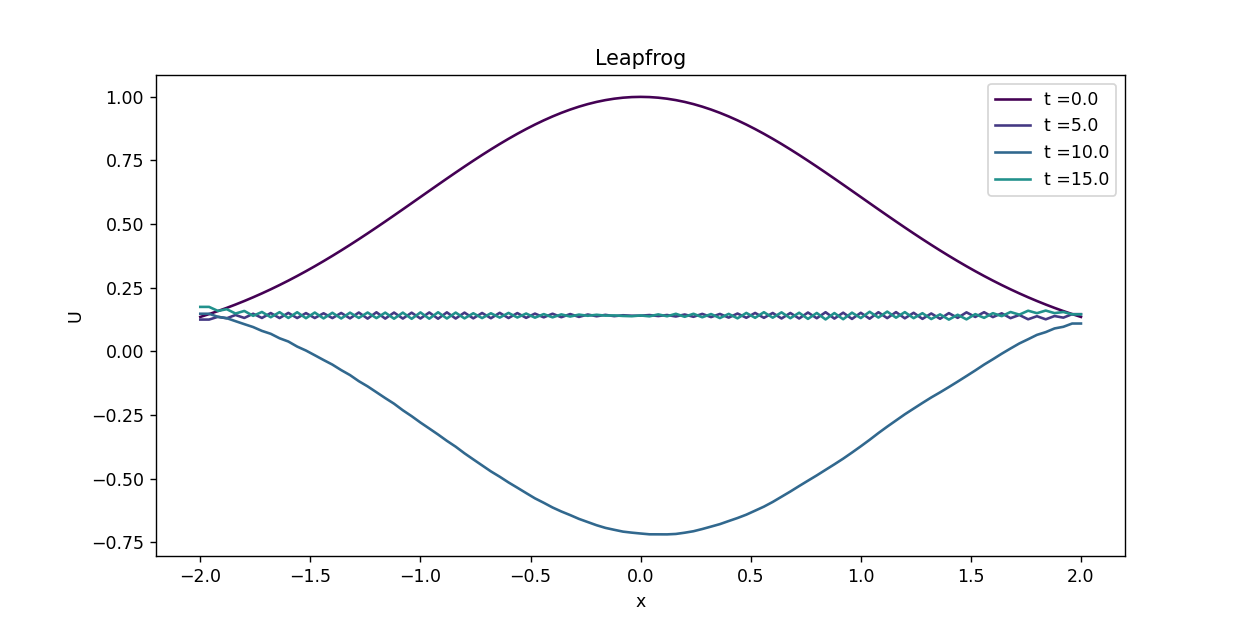

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,5))           #create axes
vcolors = plt.cm.viridis(np.linspace(0, 0.5, 4))      #colour scheme for plots
timestamps = np.linspace(0, iterations, 4)            #timestamps to create plots for
for i in range (0,4):                                 #create plots
    count = int(timestamps[i])
    ax.plot(x, U[count,:], '-', color = vcolors[i], label = 't ='+str(round(count*dt,1)))

plt.title ('Leapfrog')
plt.xlabel('x')
plt.ylabel('U')
plt.legend()
plt.show()